

# Project:  tmdb-Movies data Analyses

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will analyse the data associated with tmdb-Movies. We will find out which genre of movie is more popular and which movies made the highest  profit, also in which year were most of the movies released and more.


In [1]:
# Import the packages needed for this data analyses 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load the data  from tmdb_movies.csv 
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Inspect the data types 
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


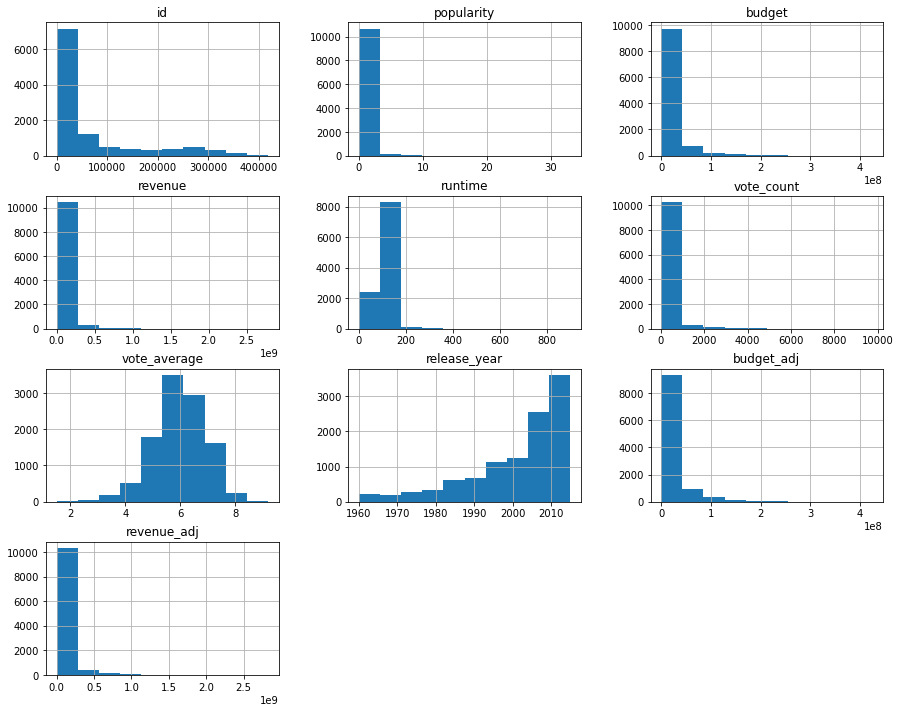

In [5]:
#Let's look at the histogram of entire DataFrame
df.hist(figsize=(15,12));


In [6]:
#Let's try to round the number of hours 
df['hourly_duration']=df['runtime']/60
df['hourly_duration']=np.round(df['hourly_duration'],decimals=1)


In [7]:
# We can check how many null values we have for each column. This can give us some idea what to clean.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
hourly_duration            0
dtype: int64



### Data Cleaning 

In [8]:
#I dropped the columns that I am not going to use. I dropped the following columns as I don't need them to answer my questions.
df.drop(['homepage', 'tagline', 'overview', 'release_date','budget', 'revenue','imdb_id','production_companies'], axis=1, inplace=True)

# confirm changes
df.head(1)


,id,popularity,original_title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,hourly_duration
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2.1


In [9]:
#Rename a few columns :  original_titel to titel ;  revenue_adj to revenue ;  budget_adj to budget  
df.rename(columns={'original_title':'title'}, inplace=True)
df.rename(columns=lambda x: x.strip().replace("_adj", ""), inplace=True)

# confirm changes
df.head(1)


,id,popularity,title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget,revenue,hourly_duration
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2.1


> I dropped the original columns for budget and revenue as those not adjusted for infaltion and renamed the budget and revenue adjusted  columns so that they will be easier to use

In [10]:
# Fill in the null values for genres and keywords  with "na" 
df['genres'] = df['genres'].fillna("na")
df['keywords'] = df['keywords'].fillna("na")
df['cast'] = df['cast'].fillna("na")
df['director'] = df['director'].fillna("na")

# Check if it worked for genres at least
df.query('genres == "na"', engine='python').head()


,id,popularity,title,cast,director,keywords,runtime,genres,vote_count,vote_average,release_year,budget,revenue,hourly_duration
424,363869,0.244648,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,na,100,na,21,6.1,2015,0.0,0.0,1.7
620,361043,0.129696,All Hallows' Eve 2,na,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,na,90,na,13,5.0,2015,0.0,0.0,1.5
997,287663,0.330431,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,na,44,na,13,6.8,2014,0.0,0.0,0.7
1712,21634,0.302095,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,na,88,na,57,7.4,2009,0.0,0.0,1.5
1897,40534,0.020701,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,duringcreditsstinger,76,na,11,7.0,2009,0.0,0.0,1.3


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10866 non-null  int64  
 1   popularity       10866 non-null  float64
 2   title            10866 non-null  object 
 3   cast             10866 non-null  object 
 4   director         10866 non-null  object 
 5   keywords         10866 non-null  object 
 6   runtime          10866 non-null  int64  
 7   genres           10866 non-null  object 
 8   vote_count       10866 non-null  int64  
 9   vote_average     10866 non-null  float64
 10  release_year     10866 non-null  int64  
 11  budget           10866 non-null  float64
 12  revenue          10866 non-null  float64
 13  hourly_duration  10866 non-null  float64
dtypes: float64(5), int64(4), object(5)
memory usage: 1.2+ MB


>  Now that we have filled in missing values for strings with "na" and dropped unnecessary columns, we have a data frame
 ready to move on with the exploration. 

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1 -  In which year were  most  movies released?

In [12]:
df['release_year'].value_counts().head(1)


2014    700
Name: release_year, dtype: int64

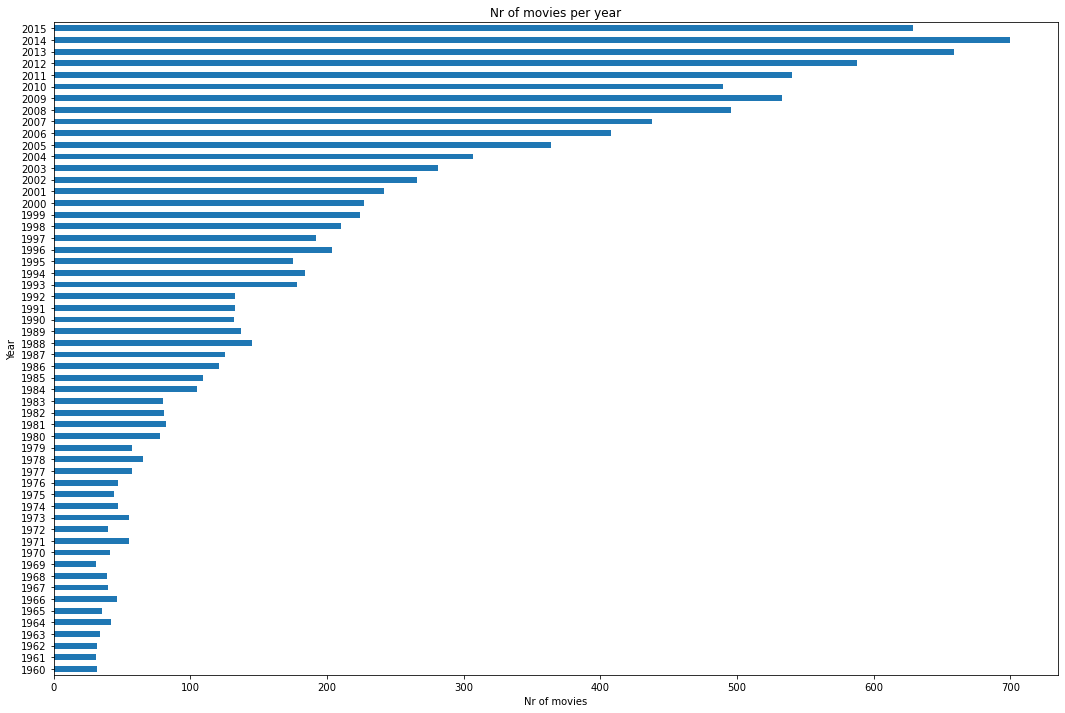

In [13]:
#Let's check the tendency of produced movies per year
df.groupby('release_year').id.count().plot(kind= 'barh',figsize=(18,12));
plt.title('Nr of movies per year')
plt.xlabel('Nr of movies')
plt.ylabel('Year');


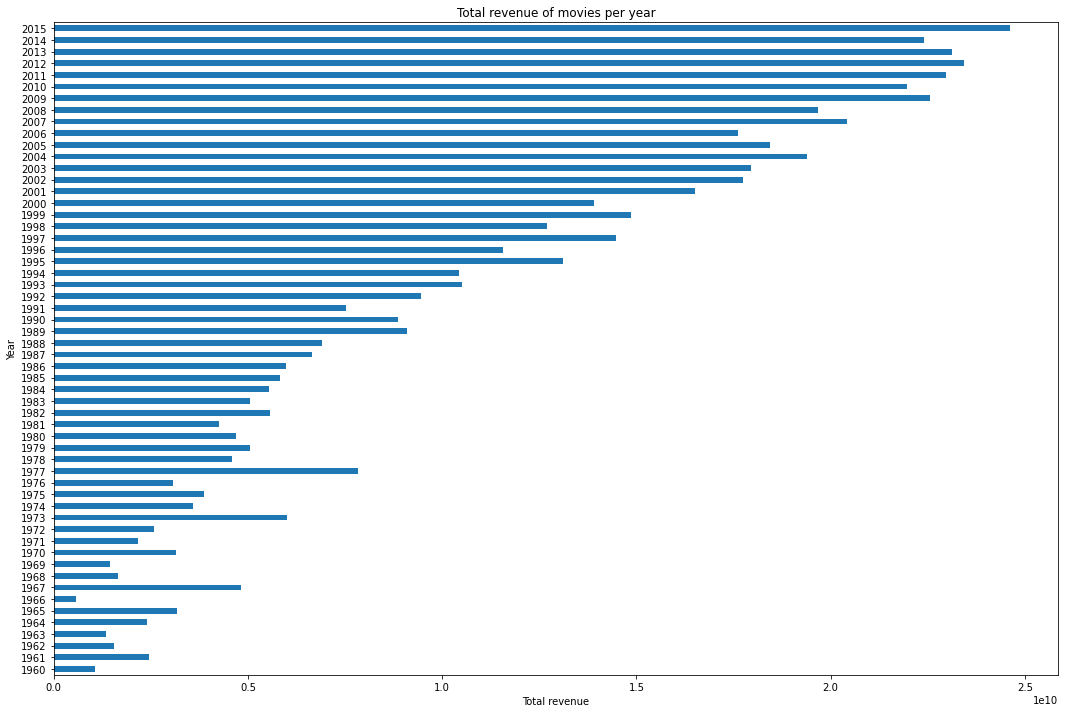

In [14]:
#Let's check the tendency of revenue per year
df.groupby('release_year').revenue.sum().plot(kind= 'barh',figsize=(18,12));
plt.title('Total revenue of movies per year')
plt.xlabel('Total revenue')
plt.ylabel('Year');


> We can observe that since 1960 the number of movies produced and the amount of revenue generated has steadily increased and that the movie industry has grown significantly over the years

###  Question 2  - Which are the most and least popular movies  and the top 5 popular directors?

In [15]:
# which is the director of the movie with the highest popularity
df.groupby('director')[['popularity']].mean().sort_values(['popularity'], ascending=False).head()


,popularity
director,
Colin Trevorrow,16.696886
Joe Russo|Anthony Russo,12.971027
Chad Stahelski|David Leitch,11.422751
Don Hall|Chris Williams,8.691294
Juno John Lee,8.411577


In [16]:
# which are 5 most popular movies
df[['title','popularity']].sort_values(['popularity'], ascending=False).head(5)

,title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507


In [17]:
# which are 5 least popular movies
df[['title','popularity']].sort_values(['popularity'], ascending=True).head(5)

,title,popularity
6181,"North and South, Book I",0.000065
9977,The Hospital,0.000188
6080,G.B.F.,0.000620
6551,Mon petit doigt m'a dit...,0.000973
6961,Khosla Ka Ghosla!,0.001115


In [18]:
# which are 5  most voted movies
df[['title','vote_count']].sort_values(['vote_count'], ascending=False).head(5)

,title,vote_count
1919,Inception,9767
4361,The Avengers,8903
1386,Avatar,8458
2875,The Dark Knight,8432
4364,Django Unchained,7375


In [19]:
# which are 5  least voted movies
df[['vote_count','id']].groupby('vote_count').count().sort_values(['vote_count'], ascending=True)

,id
vote_count,
10,501
11,474
12,422
13,377
14,323
...,...
7375,1
8432,1
8458,1


> We can observe that showing the 5 least voted movies is not possible as there are hundreds of movies with the same vote_count. This is a limitation of the dataset.

### Question 3 - What is the longest  runtime?

In [20]:
longest_movie=df.sort_values(['runtime'],ascending=False)[['title','runtime']].head(1)
print("The longest movie is:")
print(longest_movie)
average_movie_runtime=df.runtime.mean()
print("***************************")
print("The average runtime is: ")
print("***************************")
print('%.0f'%(average_movie_runtime))

The longest movie is:
                              title  runtime
3894  The Story of Film: An Odyssey      900
***************************
The average runtime is: 
***************************
102


### Question 4 - Which genres are most popular from year to year?

In [21]:
#First let's split the genres in multiple rows by delimiter '|'
df_gen=df.copy()
s = df_gen.genres.str.split('|', expand=True).stack().reset_index(drop=True, level=1).rename('genres')
df_gen=df_gen.drop('genres', axis=1).join(s)
df_gen.head(2)


,id,popularity,title,cast,director,keywords,runtime,vote_count,vote_average,release_year,budget,revenue,hourly_duration,genres
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,5562,6.5,2015,1.379999e+08,1.392446e+09,2.1,Action
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,5562,6.5,2015,1.379999e+08,1.392446e+09,2.1,Adventure


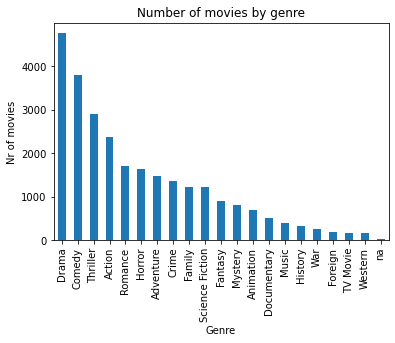

In [22]:
#Let's see which genre has the most of movies
df_gen['genres'].value_counts().plot(kind='bar');
plt.title('Number of movies by genre')
plt.xlabel('Genre')
plt.ylabel('Nr of movies');


> We can observe that  genre that hast most of the movies is Drama.
Also, we can observer that there are not many Western movies produced.

<AxesSubplot:xlabel='genres', ylabel='release_year'>

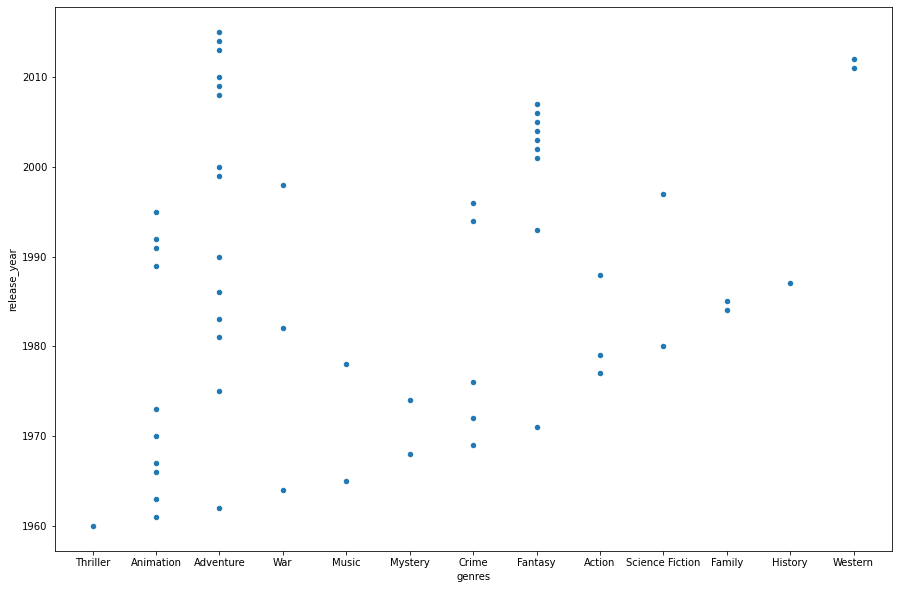

In [23]:
#which genre is more popular from year to year

#we gourped by release_year and genres and found the average of popularity per year and per genre
df3=df_gen.groupby(['genres','release_year']).popularity.mean().to_frame().reset_index()

#sort by popularity and kept only first row for each year to get the most popular genre for each year
df3=df3.sort_values('popularity', ascending=False).drop_duplicates(['release_year']).sort_values('release_year')

#plot the data
df3.plot(x="genres",y="release_year",kind="scatter",figsize=(15,10))



> Looks like Adventure is prominent lately and Fantasy was popular in between 2000 and 2007.
Animation was very popular in '60 and early '70 and also around 1990. 

### Question 5 - What are the most and least profitable movies ?

> Let's see the most and least profitable movies

In [24]:
#first let's add one more column "profit" calucalted by deducting the budget from revenue 
df['profit']=df['revenue']-df['budget']

# then we formatted profit to be more readable
df['profit_str']=df['profit'].apply(lambda x: '%.3f Billion' % (x/1e9))

#profit was sorted descending in order to get the first 5 most profitable movies
df.sort_values('profit',ascending=False).head(5)[['profit_str','title','genres']]



,profit_str,title,genres
1329,2.750 Billion,Star Wars,Adventure|Action|Science Fiction
1386,2.586 Billion,Avatar,Action|Adventure|Fantasy|Science Fiction
5231,2.235 Billion,Titanic,Drama|Romance|Thriller
10594,2.128 Billion,The Exorcist,Drama|Horror|Thriller
9806,1.879 Billion,Jaws,Horror|Thriller|Adventure


In [25]:
#the top 5 least profitable movies
df.sort_values('profit',ascending=True).head(5)[['profit_str','title','genres']]


,profit_str,title,genres
2244,-0.414 Billion,The Warrior's Way,Adventure|Fantasy|Action|Western|Thriller
5508,-0.155 Billion,The Lone Ranger,Action|Adventure|Western
2069,-0.150 Billion,The Wolfman,Horror|Thriller|Drama
10684,-0.140 Billion,Waterloo,Action|Drama|Foreign|History
7031,-0.138 Billion,The Alamo,Western|History|War


###  Question 6 - What kinds of properties are associated with movies that have high revenues?¶

In [26]:
#let's add one more column named "rating" and convert to int
df['rating']=df.popularity.astype(int)

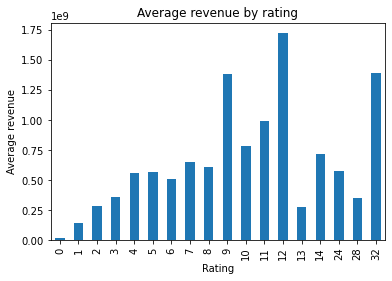

In [27]:
#let's find correlation between revenue and rating/popularity
df.groupby('rating').revenue.mean().plot(kind= 'bar');
plt.title('Average revenue by rating')
plt.xlabel('Rating')
plt.ylabel('Average revenue');



In [28]:
correlation = df["rating"].corr(df["revenue"])
print(correlation)


0.5907436000821035


> There is positive  correlation between rating and average revenue

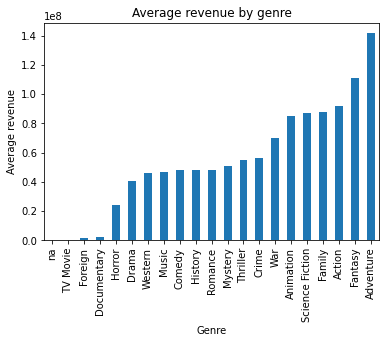

In [29]:
#Let's find correlation between revenue and genre
df_gen.groupby('genres').revenue.mean().sort_values().plot(kind= 'bar');
plt.title('Average revenue by genre')
plt.xlabel('Genre')
plt.ylabel('Average revenue');


> We can observe that Adventure has the highest revenue, while the the Documentary and Foreign genres have the lowest revenue.

In [30]:
#Let's find out the correlation between revenue and other properties like: vote_count, rating, hourly_duration, budget
vote_count_corr = df["revenue"].corr(df["vote_count"])
print("vote_count_correlation=",vote_count_corr)
rating_corr = df["revenue"].corr(df["rating"])
print("rating_correlation=",rating_corr)
duration_corr = df["revenue"].corr(df["hourly_duration"])
print("duration_correlation=",duration_corr)
budget_corr = df["revenue"].corr(df["budget"])
print("budget_correlation=",budget_corr)



vote_count_correlation= 0.7079415682214119
rating_correlation= 0.5907436000821035
duration_correlation= 0.17618350690585396
budget_correlation= 0.6466074410608971


> We can observe strong correlation between revenue and the following: vote_count, budget,  rating. 
> We can also observe that movie duration doesn't affect the revenue much.

### Question 7  - Do the longest movies need more money to invest?

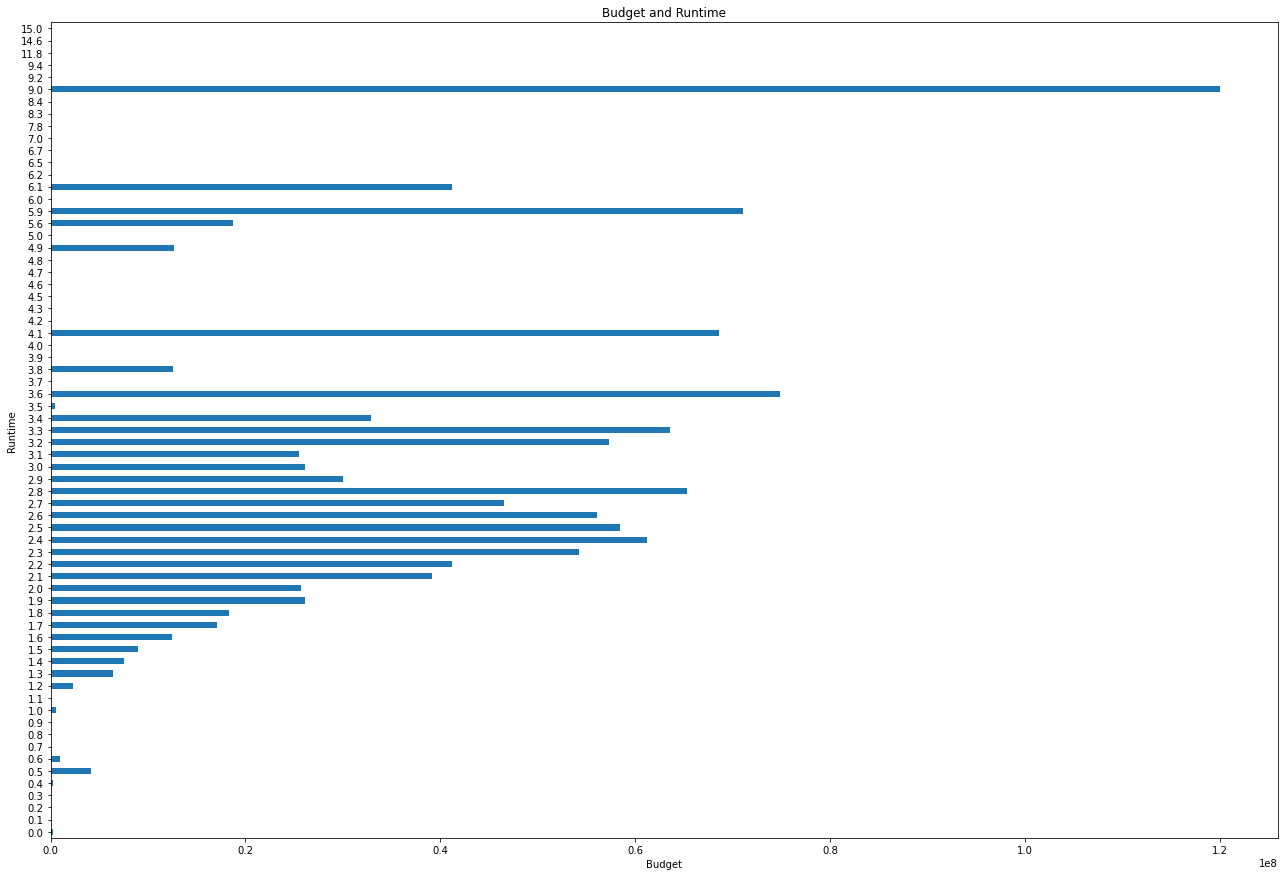

In [31]:
# Let's find the corealtion between average budget and runtime, do the longest movie need more money to invest?

df.groupby('hourly_duration').budget.mean().plot(kind= 'barh',figsize=(22,15));
plt.title('Budget and Runtime')
plt.xlabel('Budget')
plt.ylabel('Runtime');


In [32]:
correlation = df["hourly_duration"].corr(df["budget"])
print(correlation)


0.22172445450726624


> The correlation between the movie runtime and the invested budget is considerate moderate, thus a long movie doesn't necessarly need a big budget

###  Question 8  - Which are the actors which have earned the most revenue in total?

correl= 0.18906643430146647


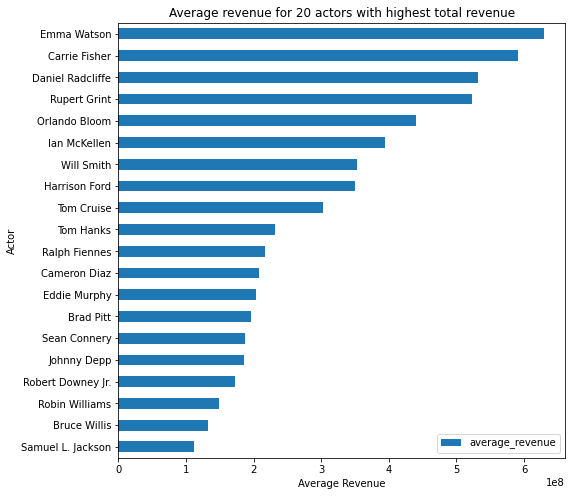

In [33]:
#Split the cast column to multiple rows
df_actors=df.copy()
s = df_actors.cast.str.split('|', expand=True).stack().reset_index(drop=True, level=1).rename('cast')
df_actors=df_actors.drop('cast', axis=1).join(s)

#Rename the column cast to actor
df_actors=df_actors.rename(columns={'cast':'actor'})


# Find the top 20 actors which we can define as those who had the highest total revenue in all movies they played in
# then show the average revenue for these actors
aa=df_actors.groupby('actor').agg({'revenue':['sum','mean','count']})
aa.columns = ['total_revenue', 'average_revenue','count']
aa=aa.sort_values(['total_revenue'], ascending=False)
aa[['average_revenue']].head(20).sort_values(['average_revenue'], ascending=True).plot(kind= 'barh',figsize=(8,8));

plt.title('Average revenue for 20 actors with highest total revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Actor');

aa_correl=aa["count"].corr(aa["average_revenue"])
print("correl=",aa_correl)


> We can observe that Emma Watson had the highest average revenue out of the 20 actors with highest total revenue. 
> We can observe that number of movies an actor plays in is not correlated to the average revenue of movies with the actor


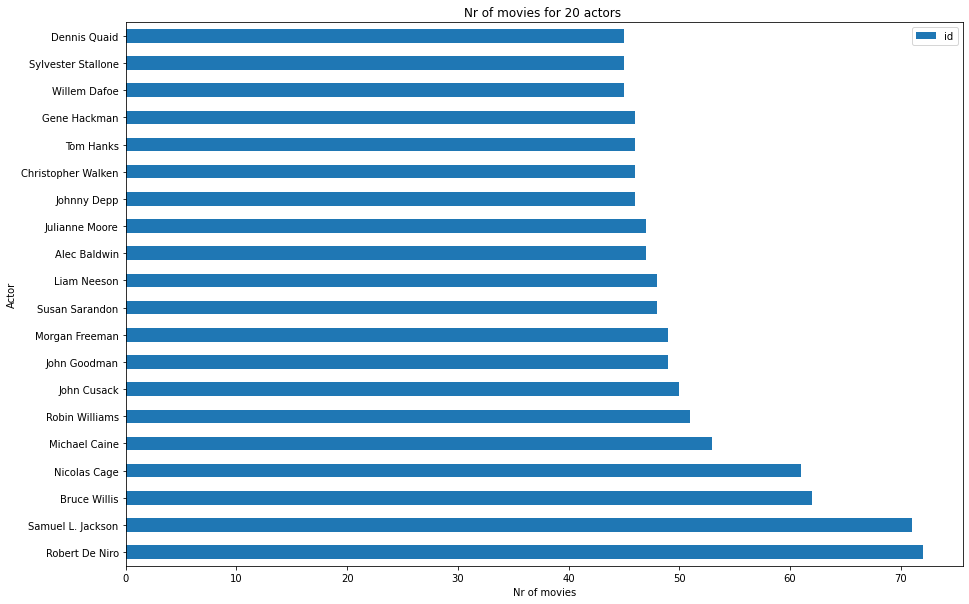

In [34]:
# first let's delete the rows with "na" for actors
df_actors=df_actors[~df_actors['actor'].isin(['na'])]

# let's find out the 20 actors that have the highest nr of movies
df_actors.groupby('actor')[['id']].count().sort_values('id',ascending=False).head(20).plot(kind= 'barh',figsize=(15,10));
plt.title('Nr of movies for 20 actors ')
plt.xlabel('Nr of movies')
plt.ylabel('Actor');

> We can observe that Robert De Niro and Samuel L. Jackson have played in the most movies.

### Question 9  - Does the popularity depend on vote count?

In [35]:
correl = df["popularity"].corr(df["vote_count"])
print("correl=",correl)

correl= 0.8008279769329716


> There is a strong correlation betwen the popularity and vote count

<a id='conclusions'></a>
## Conclusions



We explored the data set  and found some interesting trends.

We observed that the number of movies has increased significantly, especially after 2005.  The total revenue has increased as well. We can conclude that the movie industry is growing consistently since 1960 . It's hard to say why the number of produced movies is increasing steadily:  is it because people are watching more movies  or is it because they bring higher profits, we can't tell due to limitations of the data set.
	
We can conclude that Adventure was always one of the most popular genres for many years. Also, Adventure has the highest average revenue comparing to other genres. Jurassic World is the most popular movie, however the maximum  vote count was given to the movie Inception.

We observed that there is a relationship between the cast and the revenue as some actors have higher average revenue than others however we can't tell why from the data. There is very slight correlation between the number of movies an actor has and the revenue for those movies.
    
We observed strong correlation between revenue and budget, as well as popularity and vote count.